# Data Collection

We will collect the data from the Xenium Datasets on the 10x Genomics platform.

In [2]:
import requests

In [16]:
def download_file(url):
    # Get the filename from the URL
    filename = f"data/{url.split('/')[-1]}"

    # Send a GET request to the URL
    response = requests.get(url, stream=True)

    # Check if the request was successful
    if response.status_code == 200:
        # Save the file
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:  # filter out keep-alive new chunks
                    f.write(chunk)
        print(f"File '{filename}' downloaded successfully.")
    else:
        print(f"Error: Unable to download file. HTTP status code: {response.status_code}")

In [17]:
url = "https://cf.10xgenomics.com/samples/xenium/1.7.0/Xeniumranger_V1_hSkin_Melanoma_Add_on_FFPE/Xeniumranger_V1_hSkin_Melanoma_Add_on_FFPE_outs.zip"
download_file(url)

File 'data/Xeniumranger_V1_hSkin_Melanoma_Add_on_FFPE_outs.zip' downloaded successfully.


# Get Data Array

In [1]:
import zipfile

In [19]:

with zipfile.ZipFile('data/Xeniumranger_V1_hSkin_Melanoma_Add_on_FFPE_outs.zip', 'r') as data:
    data.extractall('data/hSkin_Melanoma')

This should have extracted all the outs. For now, we are interested in the transcripts data.

In [1]:
import pandas as pd

In [2]:
# Path to your .gz file
file_path = 'data/hSkin_Melanoma/transcripts.csv.gz'

# Read the gzipped CSV file into a DataFrame
df_transcripts = pd.read_csv(file_path, compression='gzip')

df_transcripts["error_prob"] = 10 ** (-df_transcripts["qv"]/10)

In [3]:
# Display the first few rows of the DataFrame
print(df_transcripts.head())

print(len(df_transcripts))

     transcript_id     cell_id  overlaps_nucleus feature_name  x_location  \
0  281479271677952  UNASSIGNED                 0        AZGP1   52.991756   
1  281479271677958  UNASSIGNED                 0      TSC22D1  107.781690   
2  281479271677962  UNASSIGNED                 0       STRADB  121.737670   
3  281479271677969  UNASSIGNED                 0       CXCL11  230.000290   
4  281479271677970  UNASSIGNED                 0        AZGP1  231.318850   

   y_location  z_location    qv fov_name  nucleus_distance  error_prob  
0   44.950270   11.706758  40.0       H4        206.374330      0.0001  
1   43.642464   11.828894  40.0       H4        151.619300      0.0001  
2   48.378370   11.834412  40.0       H4        138.141770      0.0001  
3  103.515060   12.212203  40.0       H4         62.178616      0.0001  
4  232.305390   12.184383  40.0       H4        147.449250      0.0001  
15894298


In [12]:
df_transcripts.columns

Index(['transcript_id', 'cell_id', 'overlaps_nucleus', 'feature_name',
       'x_location', 'y_location', 'z_location', 'qv', 'fov_name',
       'nucleus_distance', 'error_prob'],
      dtype='object')

# Convert the dataset s.t. each row is a cell.

In [6]:
melanoma_cells_df = df_transcripts.groupby(["cell_id", "feature_name"]).size().reset_index(name='count')
melanoma_cells_df.head()

,cell_id,feature_name,count
0,UNASSIGNED,ACER1,102
1,UNASSIGNED,ACHE,11
2,UNASSIGNED,ACTA2,73
3,UNASSIGNED,ADAM12,38
4,UNASSIGNED,AHNAK2,271


In [13]:
len(melanoma_cells_df["cell_id"].unique())

87500

# Get all transcripts of a particular gene.

In [5]:
AZGP1_expressions = df_transcripts[df_transcripts["feature_name"] == "AZGP1"]

In [6]:
len(AZGP1_expressions)

20561

# Plotting

We can plot the the locations of the transcripts using a 3D scatterplot (only for AZGP1).

In [9]:
import matplotlib.pyplot as plt

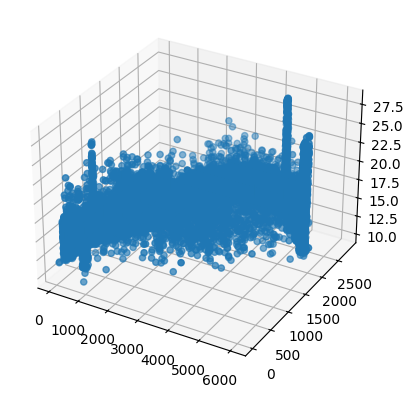

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(AZGP1_expressions["x_location"], AZGP1_expressions["y_location"], AZGP1_expressions["z_location"])

# Clustering

For now, we will use a very trivial clustering technique just to showcase what is possible with the data we have collected so far.

### Clustering with Scanpy

### Clustering with Squidpy